# Introduction to Geopandas

In this tutorial part, we will learn the basics of loading and processing geographic data using Geopandas. Geopandas is built on top of Pandas and Numpy libraries. Like Pandas Dataframe, Geopandas data structure contains GeodataFrame and GeoSeries. Geopandas provides not only the capability to read and manipulate geographic data easily but also can perform many essential geospatial operations including among others geometric operations and projections which it borrows from the Shapely library.

You can visualize and plot maps with Geopandas (provides a high-level interface to Matplotlib library) by using the plot() method on GeodataFrame/GeoSeries. In the first section, we will learn about geographic data, geographic coordinates and loading/writing geospatial data.

## Learning Objectives
1.   Read and write geographic data in Geopandas
2.   Read csv files and convert into Geopandas Geodataframe
3. Project and set Coordinate Reference Systems (CRS).



## Setup

Make sure you run the following cell(s) before trying to run any the following cells. You do not need to understand what they are doing, it's just a way to make sure there is a file we want to use stored on the computer running this notebook.

In [1]:
# Run only once
!mkdir countries_data

In [ ]:
# Run only once

%%time

import requests


def save_file(url, file_name):
  r = requests.get(url)
  with open(file_name, 'wb') as f:
    f.write(r.content)

# Download & save countries data in Shapefiles format     
# Source: https://www.naturalearthdata.com/downloads/110m-cultural-vectors/110m-admin-0-countries/
!wget https://www.naturalearthdata.com/http//www.naturalearthdata.com/download/110m/cultural/ne_110m_admin_0_countries.zip

# Download & save main cities data in GeoJSON format
# Source: http://geojson.xyz/ 
save_file('https://d2ad6b4ur7yvpq.cloudfront.net/naturalearth-3.3.0/ne_50m_populated_places_simple.geojson', 
          'ne_50m_populated_places_simple.geojson') 

# Download & save US states data in json format  
save_file('https://courses.cs.washington.edu/courses/cse163/21wi/' +
          'files/lectures/05-13/gz_2010_us_040_00_5m.json', 
          'gz_2010_us_040_00_5m.json')

# Download & save Hurricane Florence data
save_file('https://courses.cs.washington.edu/courses/cse163/21wi/' +
          'files/lectures/05-13/stormhistory.csv', 'stormhistory.csv')


!unzip ne_110m_admin_0_countries.zip -d countries_data

List files

In [ ]:
!ls

In [ ]:
# Run only once

#!pip install --upgrade pyshp

# Required Dependencies
# numpy, pandas (already installed in Colab)
# shapely (interface to GEOS)
!pip install --upgrade shapely

# fiona (interface to GDAL)
!pip install --upgrade fiona

# pyproj (interface to PROJ)
!pip install --upgrade pyproj

# rtree (spatial index to improve performance & required for overlay operations)
!pip install --upgrade rtree

# Install geopandas
!pip install --upgrade geopandas

# Geopandas requirement
!pip install --upgrade descartes


In [ ]:
# Make plot output stored in notebook
%matplotlib inline 
import numpy as np
import matplotlib.pyplot as plt


# 1. Reading Geograpahic data

In [ ]:
# Look inside data folder that we have unzipped it
!ls countries_data

ne_110m_admin_0_countries.cpg	       ne_110m_admin_0_countries.shp
ne_110m_admin_0_countries.dbf	       ne_110m_admin_0_countries.shx
ne_110m_admin_0_countries.prj	       ne_110m_admin_0_countries.VERSION.txt
ne_110m_admin_0_countries.README.html


Geographic data (Vector) comes in different formats (Shapefiles, Geopackage, Geojson ...etc).  
We can read a `GeoDataFrame` from a file using `read_file`.

## Countries Data

In [ ]:
# Read Countries data



In [ ]:
# Rows and columns of the countries data


In [ ]:
# Describtive statistics of the countries data


Geopandas is built on top of Matplotlib and Descartes to visualize maps easily. We can use `plot()` method to easily plot a map.

In [ ]:
#Plot Population estimates using Choropleth Map (color of each shapes is based on the value of an associated variable)


However, the default appearance of the legend and plot axes may not be desirable. One can define the plot axes (with `ax`) and the legend axes (with `cax`) and then pass those in to the `plot()` call. The following example uses `mpl_toolkits` to vertically align the plot axes and the legend axes:

In [ ]:
#Plot population estimates with an accurate legend


In [ ]:
#Plot population estimates with an accurate horizontal legend


You can also modify the colors used by plot() with the cmap option (for a full list of colormaps, see the [matplotlib website](https://matplotlib.org/stable/tutorials/colors/colormaps.html)):

If you want to show just the boundary, use `boundary.plot()`

Maps usually do not have to have axis labels. You can turn them off using `set_axis_off()` or `axis("off")` axis methods.

You can remove Antarctica continent

You can use similar pandas functionality, like basic stats and filterings

Note: GDP values have been updated to 2016/2017 vintage (primarily from CIA World Factbook)

Let's see if we can plot "low populated and rich" countries 
Criteria

*   GDP > 500,000 Million USD 
*   Population < 40 million people




Filter the data to rows that belong in Asia, then plot that

We can clearly see that China has the largest population.

## Cities Data

In [ ]:
# Read Cities data


# Alternative dataset included in Geopandas libary


In [ ]:
# Rows and columns of the cities data


In [ ]:
# Describtive statistics of the cities data


Now we can plot cites data points on world map (countries data), we call this "overlaying".

In [ ]:
# Plot overlayed maps

# Automatically adjusts subplot params so that the subplot(s) fits in to the figure area.

#Save plot as png file


Back to low population and rich countries data, we can also overlay them over a world map

# 2. Coordinate Systems and Projections

Coordinate reference systems represent how our data as two dimensional (planar) relates to actual places on earth. It is the glue that holds the attributes to their respective locations. Geometric shapes in a GeoSeries or GeoDataFrame object are simply a collection of coordinates in an arbitrary space. Geodataframes has `.crs` attribute that can give you the original CRS used in the data. A CRS tells Python how those coordinates relate to places on the Earth.

It is easy to transform and project these coordinates. However, to perform projections, it is necessary to have the same CRS in order to carry out geographic analysis and get the right values out the analysis. The countries, cities and rivers have the same CRS. Let's check them.

Projections are referenced using **European Petroleum Survey Group (EPSG)** codes

Different CRS have different measurements. For some, the coordinates are defined in decimal degrees while others are defined in meters. It is common process to reproject data from one format to another in Geographic data processing. This source is very useful in visualizing and comparing different Projections: https://map-projections.net/compare.php?p1=mercator-84&p2=robinson&sps=1

## Project into Mercator Projection

We will project our data into mercator. The Mercator projection, latitude-longitude quadrangles are stretched along the x-axis and y-axis as you move away from the equator.

In [ ]:
# Look at the geometry column: decimal degrees


In [ ]:
# Project the data into Mercator Projection epsg=3395


# See the geometry column of the projected countries


Due to the projection, the geometry is no longer in lat/lon style. It is easier to understand the difference in maps. Let us plot both the original countries and the projected countries.

In [ ]:
# Let us plot both unprojected and projected countries


Notice the different scales of x and y in both maps. If you try to overlay the projected data with unprojected data, then your data will not align properly. Let us see if we can plot cities on the top of projected countries. Remember we have not projected the cities.

In [ ]:

# Cities are still in WGS84


## **Exercise 1**: Convert the cities data into EPSG:3395 and plot cities on top of countries_projected

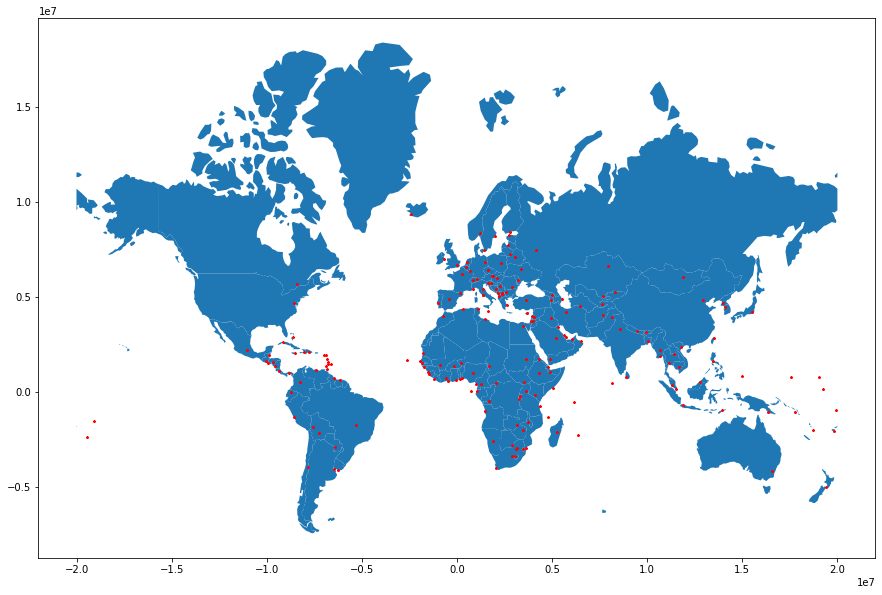

# 3. Writing Geographic/Spatial Data

We can easily save any new data created to our local disk. This is helpful when you want to access that file in another time without carrying out the same operations again. Let us save our projected countries to our disk space. Remember we have projected it. So in case we need it another time, let us save it.

GeoDataFrames can be exported to many different standard formats using the `to_file(path/to/file + extension)`

In [ ]:
!mkdir countries_projected_data

In [ ]:
# Save projected countries to Shapefile


In [ ]:
# Save projected countries to GeoJSON


## **Exercise 2**: Save the projected cities file you created in Exercise 1 into a shp file.

In [ ]:
!mkdir cities_projected_data

# 4. Convert DataFrame to a GeodataFrame

In certain circumstance, a dataset might store geodata in a dataframe format.

This example will plot the data of the hurricane at various points in time over US states.

Hawaii is on the far right and Alaska is on the top left, we should exclude them to filter only mainland USA.

We noticed that this is a plain old DataFrame and does not have the capability of doing geo operations yet. We first have to transform the data into a `GeoDataFrame` so we can plot it appropriately.

To do this, we will create a new colum that stores the latitude/longitude together in a `Point`. We need to use the `zip` function to do this.

In [ ]:
# Convert the florence DataFrame into a GeoDataFrame
